In [230]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G



In [231]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))




In [232]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

In [233]:

keep_en = []
def transform_now(data):
    keep_en.append(LabelEncoder())
    data[:,0]=keep_en[0].fit_transform(data[:,0])


In [234]:
    
def fill_value_miss(miss_data):
#     print(miss_data)
    df = pd.DataFrame(miss_data)
#     print(df.isnull().sum())
    df.fillna(method='backfill',inplace=True)
    df = df.to_numpy()
    transform_now(df)
    return df

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     data[:,0]=keep_en[0].inverse_transform(xx)




def find_value_miss(G):
     "DayKey","ProductGroup","Area","Channel"
     print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0,1],G[0,2],G[0,3]))
     print("start : {}, end : {} ".format(G[0, 0],G[-1, 0]))
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[origin_index,0] == date_full[i]:   #G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = None
               count_miss_day += 1
     # print(miss_data)
     miss_data = fill_value_miss(miss_data)
     # print('missing CumSales of invidual day =',count_miss_day)
     return miss_data

In [235]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 



In [236]:
A=find_group(1,2,2)
info = find_value_miss(All_Group[A])
# inverse_d_new(info)
# transform_now(info)
info
from sklearn.linear_model import LinearRegression

x_train = info[1977:1987,0]
y_train = info[1977:1987,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[2006,0]
pred=dtree.predict([[x]])

print('R2:',dtree.score(x_train.reshape(-1,1),y_train))
print(pred)
info[2006,1]

ProductGroup : G1, Area : A2 ,Channel : C2
start : 2010-01-04, end : 2022-05-31 
R2: 0.9798897514072593
[85398.41212121]


94265.0

In [237]:
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
x_train = info[59:64,0]
y_train = info[59:64,1]

dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)
# print(dtree.coef_)
print(dtree.score(x_train.reshape(-1,1),y_train))
x = info[89,0]
pred=dtree.predict([[x]])
inverse_d_new(info)



ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
0.9497211102122766


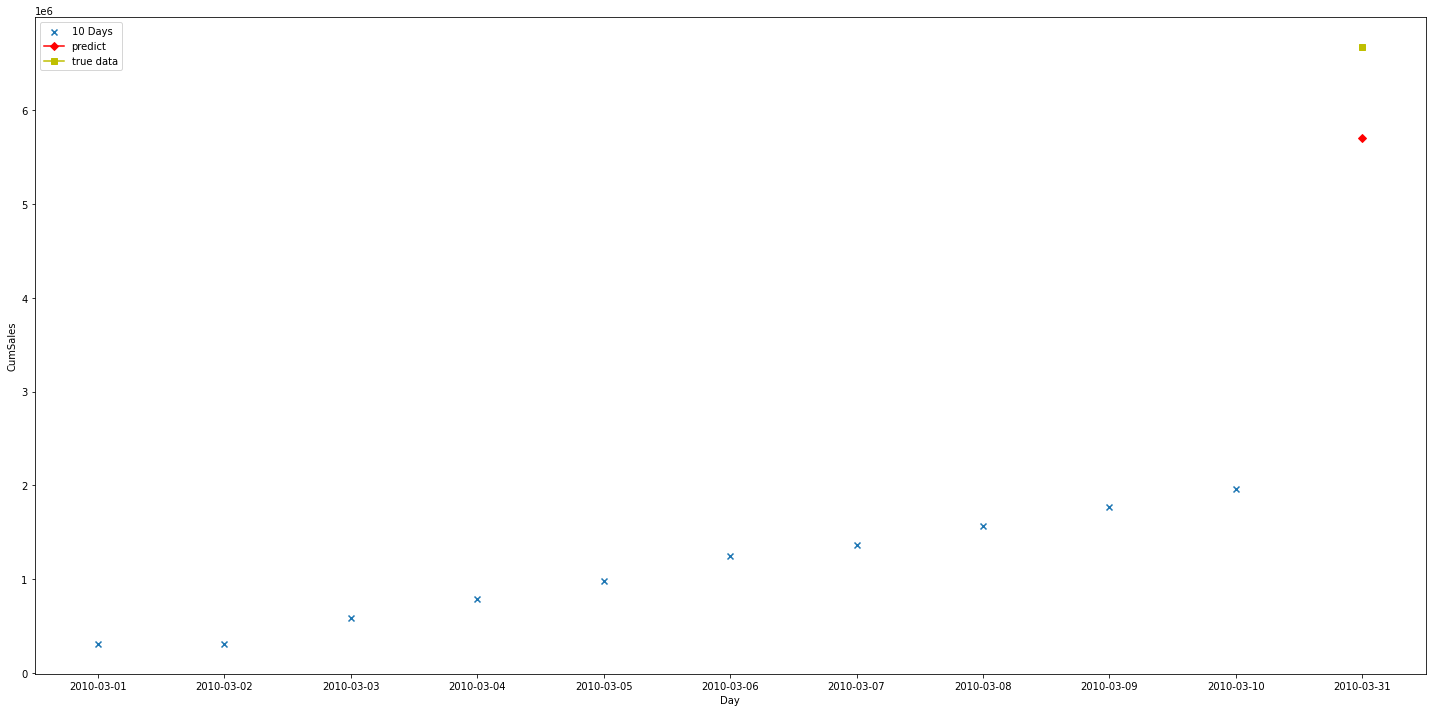

In [238]:
plt.figure(figsize=(20,10))
# inverse_d_new(info)
plt.scatter(info[59:69,0],info[59:69,1],marker='x',label='10 Days')
plt.plot(info[89,0],pred,marker='D',color='r',label='predict')
plt.plot(info[89,0],info[89,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()

ProductGroup : G7, Area : A6 ,Channel : C2
start : 2010-01-04, end : 2022-05-31 
[2950.38787879]
0.8729220205356045


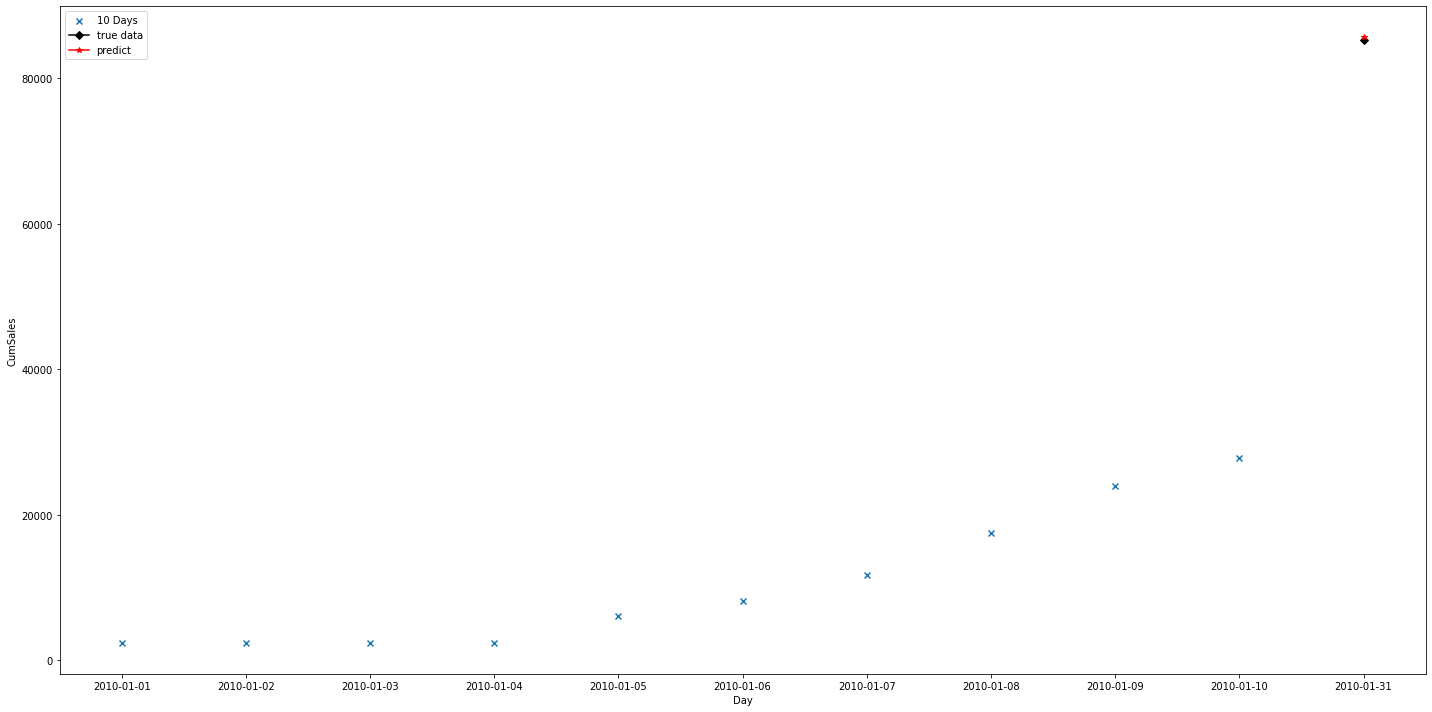

array([['2010-01-04', 2339.0],
       ['2010-01-05', 6117.0],
       ['2010-01-06', 8168.0],
       ['2010-01-07', 11766.0],
       ['2010-01-08', 17523.0],
       ['2010-01-09', 23999.0]], dtype=object)

In [239]:
A = find_group(7,6,2)
# inverse_d(All_Group[A],'G7', 'A6', 'C2')
info = find_value_miss(All_Group[A])
x_train = info[0:10,0]
y_train = info[0:10,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)
print(dtree.coef_)
print(dtree.score(x_train.reshape(-1,1),y_train))
x = info[30,0]
pred=dtree.predict([[x]])

plt.figure(figsize=(20,10))
inverse_d_new(info)
plt.scatter(info[0:10,0],info[0:10,1],marker='x',label='10 Days')
plt.plot(info[30,0],info[30,1],marker='D',color='k',label='true data')
plt.plot(info[30,0],pred,marker='*',color='r',label='predict')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()
info[3:9]
# print(pred)
# print(info[30,1])

ProductGroup : G1, Area : A6 ,Channel : C2
start : 2010-01-02, end : 2022-05-31 
1.0
[148955.]      85774.0


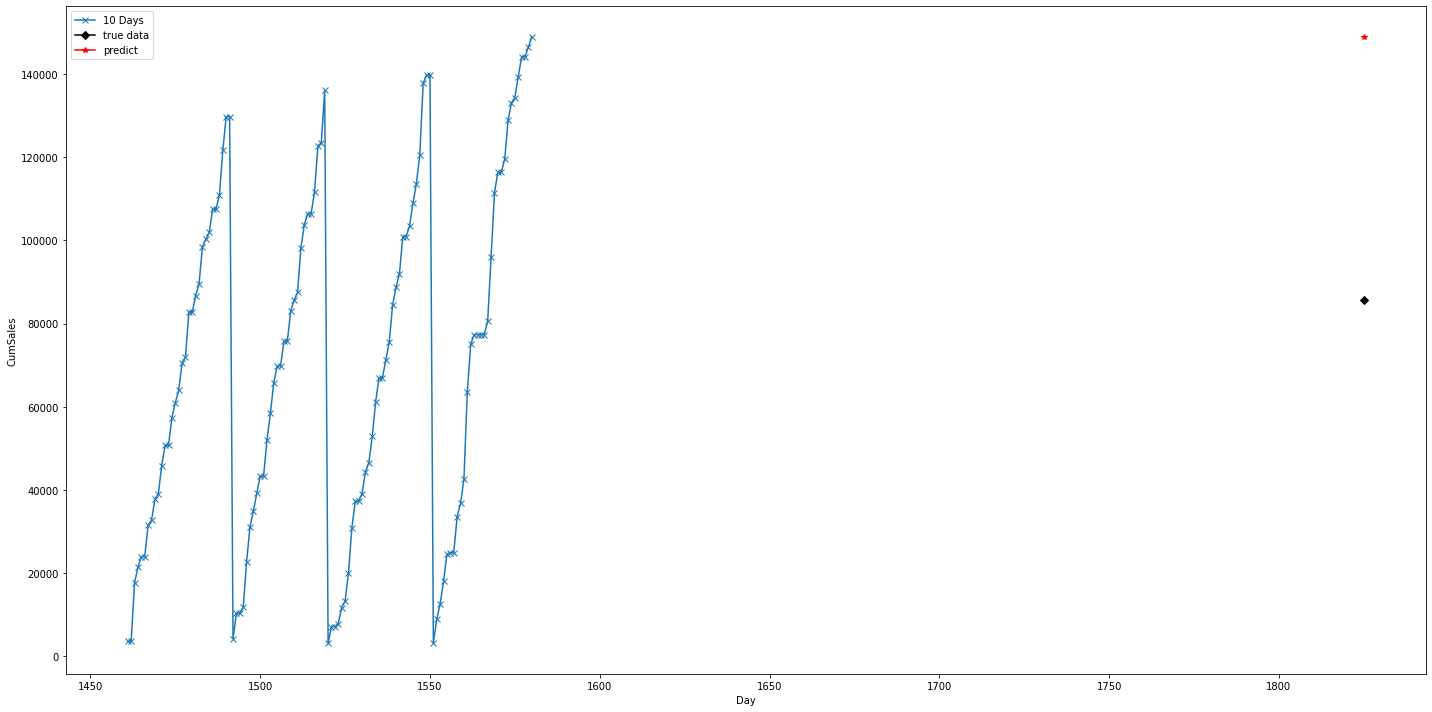

2014-01-01 ----------> 2014-04-30


In [254]:
A = find_group(1,6,2)
# inverse_d(All_Group[A],'G7', 'A6', 'C2')
info = find_value_miss(All_Group[A])
#4534

info[1825] #'2014-12-31'
info[1461:1590] #'2014-01-01'
# info[1590]
x_train = info[1461:1581,0]
y_train = info[1461:1581,1]
dtree = DecisionTreeRegressor(max_depth=12)
# dtree = KNeighborsRegressor(n_neighbors=22)
# dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)
# # print(dtree.coef_)
print(dtree.score(x_train.reshape(-1,1),y_train))
x = info[1825,0]
pred=dtree.predict([[x]])
print(pred,"    ",info[1825,1])
plt.figure(figsize=(20,10))
plt.plot(info[1461:1581,0],info[1461:1581,1],marker='x',label='10 Days')
plt.plot(info[1825,0],info[1825,1],marker='D',color='k',label='true data')
plt.plot(info[1825,0],pred,marker='*',color='r',label='predict')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()
inverse_d_new(info)
print(info[1461,0],"---------->",info[1580,0])
# print("depth is :",dtree.get_depth())


ProductGroup : G2, Area : A3 ,Channel : C2
start : 2010-02-09, end : 2021-11-25 
1.0


'2010-02-28'

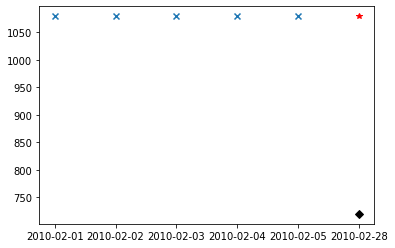

In [265]:
A = find_group(2,3,2)
info=find_value_miss(All_Group[A])

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
x_train = info[31:36,0]
y_train = info[31:36,1]

dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)
# print(dtree.coef_)
print(dtree.score(x_train.reshape(-1,1),y_train))
x = info[30,0]
pred=dtree.predict([[x]])
inverse_d_new(info)
# info[31:36,0]
plt.scatter(info[31:36,0],info[31:36,1],marker='x',label='10 Days')
plt.plot(info[58,0],info[58,1],marker='D',color='k',label='true data')
plt.plot(info[58,0],pred,marker='*',color='r',label='predict')
info[58,0]